In [7]:
import pandas as pd

# Daten laden
url = "skincare_products.csv"
df = pd.read_csv(url)

# Erste Zeilen anzeigen, um die Daten zu überprüfen
print(df.head())


                                        product_name  \
0  The Ordinary Natural Moisturising Factors + HA...   
1      CeraVe Facial Moisturising Lotion SPF 25 52ml   
2  The Ordinary Hyaluronic Acid 2% + B5 Hydration...   
3          AMELIORATE Transforming Body Lotion 200ml   
4                     CeraVe Moisturising Cream 454g   

                                         product_url product_type  \
0  https://www.lookfantastic.com/the-ordinary-nat...  Moisturiser   
1  https://www.lookfantastic.com/cerave-facial-mo...  Moisturiser   
2  https://www.lookfantastic.com/the-ordinary-hya...  Moisturiser   
3  https://www.lookfantastic.com/ameliorate-trans...  Moisturiser   
4  https://www.lookfantastic.com/cerave-moisturis...  Moisturiser   

                                         ingredients   price  
0  Aqua (Water), Caprylic/Capric Triglyceride, Ce...   £5.20  
1  Aqua/Water, Homosalate, Glycerin, Octocrylene,...  £13.00  
2  Aqua (Water), Sodium Hyaluronate, Sodium Hyalu...   £6.2

In [8]:
#textvorverarbeitung

import re

def preprocess_ingredients(text):
    text = text.lower()  # in Kleinbuchstaben umwandeln
    text = re.sub(r'[^a-z,]', '', text)  # Nicht-Buchstaben entfernen, außer Kommas
    ingredients = text.split(",")  # Bei Kommas trennen
    ingredients = [ingredient.strip() for ingredient in ingredients]  # Leerzeichen entfernen
    return ingredients

df['processed_ingredients'] = df['ingredients'].apply(preprocess_ingredients)
print(df['processed_ingredients'].head())



0    [aquawater, capryliccaprictriglyceride, cetyla...
1    [aquawater, homosalate, glycerin, octocrylene,...
2    [aquawater, sodiumhyaluronate, sodiumhyalurona...
3    [aquawatereau, ammoniumlactate, calkylbenzoate...
4    [purifiedwater, glycerin, cetearethandcetearyl...
Name: processed_ingredients, dtype: object


In [9]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load pre-trained model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

# Function to get embeddings for a batch of text
def get_embeddings(text):
    encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        output = model(**encoded_input)
    return output.pooler_output.squeeze().numpy()

# Applying the function on the concatenated ingredient text
df['ingredient_text'] = df['processed_ingredients'].apply(lambda x: ', '.join(x))
df['embeddings'] = df['ingredient_text'].apply(get_embeddings)


In [10]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity




# Assuming embeddings are stored as a list of numpy arrays
embeddings = np.stack(df['embeddings'].values)
cosine_sim = cosine_similarity(embeddings)

def enhanced_recommend_products(product_name, df, cosine_sim, top_k=10):
    idx = df[df['product_name'] == product_name].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    product_indices = [i[0] for i in sim_scores[1:top_k+1]]
    return df.loc[product_indices, ['product_name', 'product_url', 'product_type']]

# Test the enhanced recommendation function
print(enhanced_recommend_products("The Ordinary Natural Moisturising Factors + HA 30ml", df, cosine_sim))



                                          product_name  \
7    The Ordinary Natural Moisturizing Factors + HA...   
44               Skin Doctors Sd White & Bright (50ml)   
122               The Ordinary Marine Hyaluronics 30ml   
355    Zelens PROVITAMIN D Fortifying Facial Mist 50ml   
223       Elizabeth Arden Prevage Advanced Daily Serum   
210                      Indeed Labs Pepta-Bright 30ml   
390  La Roche-Posay Cicaplast Baume B5 Repairing Ba...   
667  Estée Lauder Resilience Multi-Effect Tri-Pepti...   
622  Fade Out Advanced Even Skin Tone Eye Defence C...   
680        SkinCeuticals A.G.E. Eye Complex Cream 15ml   

                                           product_url product_type  
7    https://www.lookfantastic.com/the-ordinary-nat...  Moisturiser  
44   https://www.lookfantastic.com/skin-doctors-sd-...  Moisturiser  
122  https://www.lookfantastic.com/the-ordinary-mar...        Serum  
355  https://www.lookfantastic.com/zelens-provitami...         Mist  
223  https:

In [21]:
%pip install transformers torch


     ---------------------------------------- 0.0/43.8 kB ? eta -:--:--
     ----------------- -------------------- 20.5/43.8 kB 217.9 kB/s eta 0:00:01
     -------------------------- ----------- 30.7/43.8 kB 217.9 kB/s eta 0:00:01
     ----------------------------------- -- 41.0/43.8 kB 245.8 kB/s eta 0:00:01
     -------------------------------------- 43.8/43.8 kB 238.1 kB/s eta 0:00:00
  Using cached PyYAML-6.0.1-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB ? eta 0:00:00
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached MarkupSafe-2.1.5-cp312-cp312-win_amd64.whl.metadata (3.1 kB)
  Using cached charset_normalizer-3.3.2-cp312-cp312-win_amd64.whl.metadata (34 kB)
  Using cached id

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [22]:
from transformers import AutoTokenizer, AutoModel
import torch
print("Transformers and Torch have been successfully installed.")



c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Transformers and Torch have been successfully installed.


In [23]:
import sys
print("Python executable:", sys.executable)

Python executable: c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\python.exe


In [27]:
%pip install scikit-learn



  Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl (10.9 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl (45.9 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [4]:
%pip install sentence-transformers
import pandas as pd
import numpy as np
import re
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

# Daten laden
url = "skincare_products.csv"
df = pd.read_csv(url)

# Erste Zeilen anzeigen, um die Daten zu überprüfen
print(df.head())


Note: you may need to restart the kernel to use updated packages.
                                        product_name  \
0  The Ordinary Natural Moisturising Factors + HA...   
1      CeraVe Facial Moisturising Lotion SPF 25 52ml   
2  The Ordinary Hyaluronic Acid 2% + B5 Hydration...   
3          AMELIORATE Transforming Body Lotion 200ml   
4                     CeraVe Moisturising Cream 454g   

                                         product_url product_type  \
0  https://www.lookfantastic.com/the-ordinary-nat...  Moisturiser   
1  https://www.lookfantastic.com/cerave-facial-mo...  Moisturiser   
2  https://www.lookfantastic.com/the-ordinary-hya...  Moisturiser   
3  https://www.lookfantastic.com/ameliorate-trans...  Moisturiser   
4  https://www.lookfantastic.com/cerave-moisturis...  Moisturiser   

                                         ingredients   price  
0  Aqua (Water), Caprylic/Capric Triglyceride, Ce...   £5.20  
1  Aqua/Water, Homosalate, Glycerin, Octocrylene,...  £1

In [5]:
# Funktion zur Vorverarbeitung der Inhaltsstoffe
def preprocess_ingredients(text):
    text = text.lower()  # In Kleinbuchstaben umwandeln
    text = re.sub(r'[^a-z,]', '', text)  # Nicht-Buchstaben entfernen, außer Kommas
    ingredients = text.split(",")  # Bei Kommas trennen
    ingredients = [ingredient.strip() for ingredient in ingredients]  # Leerzeichen entfernen
    return ingredients

df['processed_ingredients'] = df['ingredients'].apply(preprocess_ingredients)
df['ingredient_text'] = df['processed_ingredients'].apply(lambda x: ', '.join(x))

In [6]:
# Modell laden (aus tokens_and_embeddings.ipynb)
model_name = "paraphrase-multilingual-MiniLM-L12-v2"
model = SentenceTransformer(model_name)

# Funktion zur Berechnung der Embeddings (aus tokens_and_embeddings.ipynb)
def get_embeddings(text):
    return model.encode(text, show_progress_bar=False)

df['embeddings'] = df['ingredient_text'].apply(get_embeddings)

# Cosine Similarity berechnen (aus tokens_and_embeddings.ipynb)
embeddings = np.stack(df['embeddings'].values)
cosine_sim = cosine_similarity(embeddings)

c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\goern_y\.cache\huggingface\hub\models--sentence-transformers--paraphrase-multilingual-MiniLM-L12-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\goern_y\.pyenv\pyenv-win\versions\3.12.1\Lib

In [10]:
# Erweiterte Empfehlungsfunktion mit Cosine Similarity-Werten
def enhanced_recommend_products(product_name, df, cosine_sim, top_k=10):
    try:
        idx = df[df['product_name'] == product_name].index[0]
    except IndexError:
        return "Produktname nicht gefunden."

    try:
        product_price = df.at[idx, 'price']  # Preis des Referenzprodukts
    except KeyError:
        return "Spalte 'price' nicht gefunden."

    # Ähnlichkeitswerte berechnen und sortieren
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Produkte filtern, die günstiger oder gleich teuer sind
    filtered_indices = [(i[0], i[1]) for i in sim_scores if df.at[i[0], 'price'] <= product_price and i[0] != idx][:top_k]

    # Empfohlene Produkte zurückgeben
    recommended_products = df.loc[[i[0] for i in filtered_indices], ['product_name', 'product_url', 'product_type', 'price']]
    recommended_products['cosine_similarity'] = [i[1] for i in filtered_indices]

    return recommended_products

# Test der erweiterten Empfehlungsfunktion
print(enhanced_recommend_products("The Ordinary Natural Moisturising Factors + HA 30ml", df, cosine_sim))

                                           product_name  \
702                     CeraVe Hydrating Cleanser 473ml   
704                CeraVe Foaming Facial Cleanser 473ml   
322   Lumene Nordic Hydra [Lähde] Arctic Spring Wate...   
5                      CeraVe Moisturising Lotion 473ml   
643   Lumene Nordic Hydra [Lähde] Purity Dew Drops H...   
98    Fade Out ADVANCED + Age Protection Even Skin T...   
705                     CeraVe Smoothing Cleanser 236ml   
1007  La Roche-Posay Lipikar Syndet AP(+) Shower Gel...   
495   Garnier Moisture Bomb Deep Sea Water & Hyaluro...   
1         CeraVe Facial Moisturising Lotion SPF 25 52ml   

                                            product_url product_type   price  \
702   https://www.lookfantastic.com/cerave-hydrating...     Cleanser  £15.00   
704   https://www.lookfantastic.com/cerave-foaming-f...     Cleanser  £15.00   
322   https://www.lookfantastic.com/lumene-nordic-hy...         Mist  £12.00   
5     https://www.lookfantasti

In [11]:
#Testbereich Empfehlung ohne Produttyp-Filter

print(enhanced_recommend_products("The Ordinary Natural Moisturising Factors + HA 30ml", df, cosine_sim))

                                           product_name  \
702                     CeraVe Hydrating Cleanser 473ml   
704                CeraVe Foaming Facial Cleanser 473ml   
322   Lumene Nordic Hydra [Lähde] Arctic Spring Wate...   
5                      CeraVe Moisturising Lotion 473ml   
643   Lumene Nordic Hydra [Lähde] Purity Dew Drops H...   
98    Fade Out ADVANCED + Age Protection Even Skin T...   
705                     CeraVe Smoothing Cleanser 236ml   
1007  La Roche-Posay Lipikar Syndet AP(+) Shower Gel...   
495   Garnier Moisture Bomb Deep Sea Water & Hyaluro...   
1         CeraVe Facial Moisturising Lotion SPF 25 52ml   

                                            product_url product_type   price  \
702   https://www.lookfantastic.com/cerave-hydrating...     Cleanser  £15.00   
704   https://www.lookfantastic.com/cerave-foaming-f...     Cleanser  £15.00   
322   https://www.lookfantastic.com/lumene-nordic-hy...         Mist  £12.00   
5     https://www.lookfantasti

In [14]:
# Erweiterte Empfehlungsfunktion mit Produkttyp- und Cosine Similarity-Filter
def enhanced_recommend_products_same_type(product_name, df, cosine_sim, top_k=10):
    try:
        idx = df[df['product_name'] == product_name].index[0]
    except IndexError:
        return "Produktname nicht gefunden."

    try:
        product_price = df.at[idx, 'price']  # Preis des Referenzprodukts
        product_type = df.at[idx, 'product_type']  # Produkttyp des Referenzprodukts
    except KeyError as e:
        return f"Spalte {e} nicht gefunden."

    # Ähnlichkeitswerte berechnen und sortieren
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Produkte filtern, die günstiger oder gleich teuer und vom gleichen Produkttyp sind
    filtered_indices = [(i[0], i[1]) for i in sim_scores if df.at[i[0], 'price'] <= product_price and df.at[i[0], 'product_type'] == product_type and i[0] != idx][:top_k]

    # Empfohlene Produkte zurückgeben
    recommended_products = df.loc[[i[0] for i in filtered_indices], ['product_name', 'product_url', 'product_type', 'price']]
    recommended_products['cosine_similarity'] = [i[1] for i in filtered_indices]

    return recommended_products

# Test der erweiterten Empfehlungsfunktion mit Produkttyp-Filter
print(enhanced_recommend_products_same_type("The Ordinary Natural Moisturising Factors + HA 30ml", df, cosine_sim))


                                          product_name  \
5                     CeraVe Moisturising Lotion 473ml   
98   Fade Out ADVANCED + Age Protection Even Skin T...   
1        CeraVe Facial Moisturising Lotion SPF 25 52ml   
40           La Roche-Posay Nutritic Intense Rich 50ml   
58        The INKEY List Multi-Biotic Moisturiser 30ml   
72                 Bulldog Sensitive Moisturiser 100ml   
6        CeraVe Facial Moisturising Lotion No SPF 52ml   
36   La Roche-Posay Effaclar K(+) Anti-Blackhead Mo...   
103                        Liz Earle Skin Repair Light   
23                  Bulldog Original Moisturiser 100ml   

                                           product_url product_type   price  \
5    https://www.lookfantastic.com/cerave-moisturis...  Moisturiser  £15.00   
98   https://www.lookfantastic.com/fade-out-advance...  Moisturiser  £12.99   
1    https://www.lookfantastic.com/cerave-facial-mo...  Moisturiser  £13.00   
40   https://www.lookfantastic.com/la-roche-p


  Using cached matplotlib-3.9.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.5 kB ? eta -:--:--
     --------- --------------------------- 41.0/165.5 kB 326.8 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/165.5 kB 819.2 kB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 1.1 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.0-cp312-cp312-win_amd64.whl (8.0 MB)
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------------------------------------- 294.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


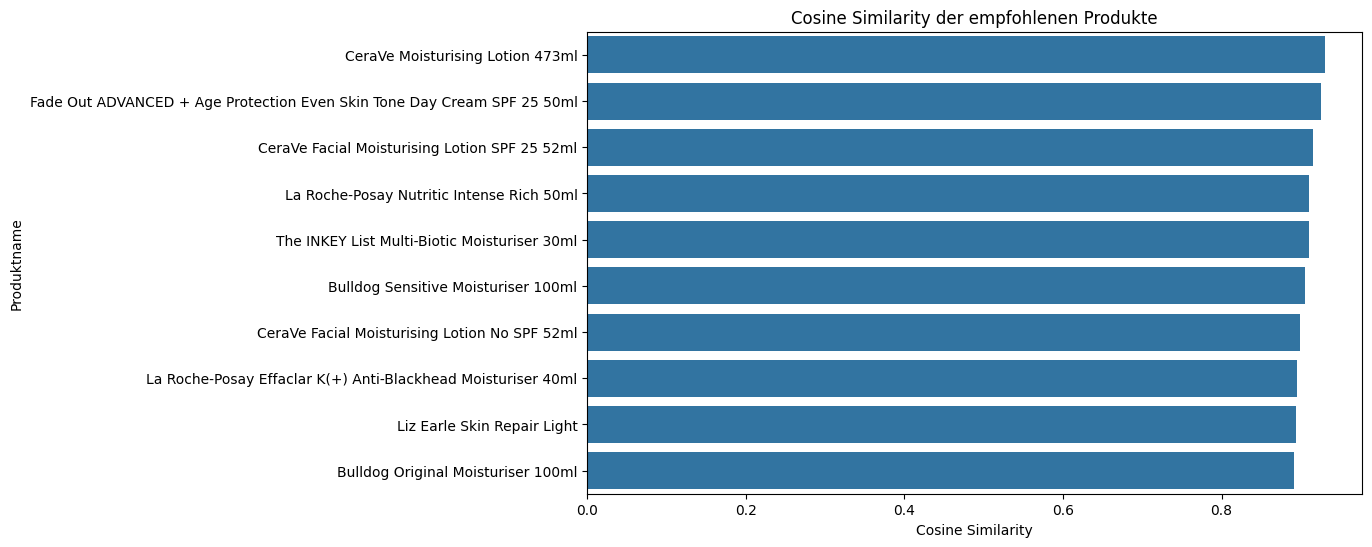

In [17]:
%pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Funktion zur Visualisierung der Cosine Similarity der empfohlenen Produkte
def plot_cosine_similarity(recommended_products):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='cosine_similarity', y='product_name', data=recommended_products)
    plt.title('Cosine Similarity der empfohlenen Produkte')
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Produktname')
    plt.show()

# Beispielaufruf der Visualisierungsfunktion
recommended_products = enhanced_recommend_products_same_type("The Ordinary Natural Moisturising Factors + HA 30ml", df, cosine_sim)
plot_cosine_similarity(recommended_products)

